# Example usage

To use `pylaptoppred` in a project:

In [1]:
import pylaptoppred

print(pylaptoppred.__version__)

0.1.0


In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [4]:
#Import required functions
from pylaptoppred.copy_file import copy_file
from pylaptoppred.function_data_cleaning import clean_and_save_data_f
from pylaptoppred.model import *
from pylaptoppred.save_plot import save_plot

## Copy file example

In [5]:
# Writing to a file to act as our input file
input_path = 'sample_input.txt'
with open(input_path, 'w') as file:
    file.write('Hello, this is a test file!')

# Define the output path
output_path = 'sample_output.txt'



In [6]:
copy_file(input_path, output_path)

File successfully copied from sample_input.txt to sample_output.txt


In [7]:
#Verify
# Reading from the output file
with open(output_path, 'r') as file:
    content = file.read()
print(content)

Hello, this is a test file!


## Clean_and_save_data_f example

In [12]:
train, test = clean_and_save_data_f('DATA/laptops.csv', 'DATA') 

Data cleaned and saved to DATA_train.csv and DATA_test.csv


In [13]:
print(train.head())
print(test.head())

     index   brand                                              Model  Price  \
657    669      hp  HP Envy x360 15-fe0028TU Laptop (13th Gen Core...  96590   
690    702  lenovo  Lenovo IdeaPad Gaming 3 15IAH7 82S9014KIN Lapt...  71990   
49      53    dell  Dell Vostro 3425 Laptop (AMD Ryzen 5 5625U/ 8G...  39649   
0        1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  23990   
978    990     msi  MSI Modern 14 C13M-437IN Laptop (13th Gen Core...  40990   

     Rating processor_brand processor_tier  num_cores  num_threads  \
657      66           intel        core i5         10           12   
690      70           intel        core i5          8           12   
49       66             amd        ryzen 5          6           12   
0        63           intel        core i3          2            4   
978      56           intel        core i5         10           12   

     ram_memory  ... secondary_storage_type  secondary_storage_capacity  \
657          16  ...   

## Save_plot example

In [16]:
# Make sure the path to the data file is correct
df = pd.read_csv('DATA/laptops.csv')


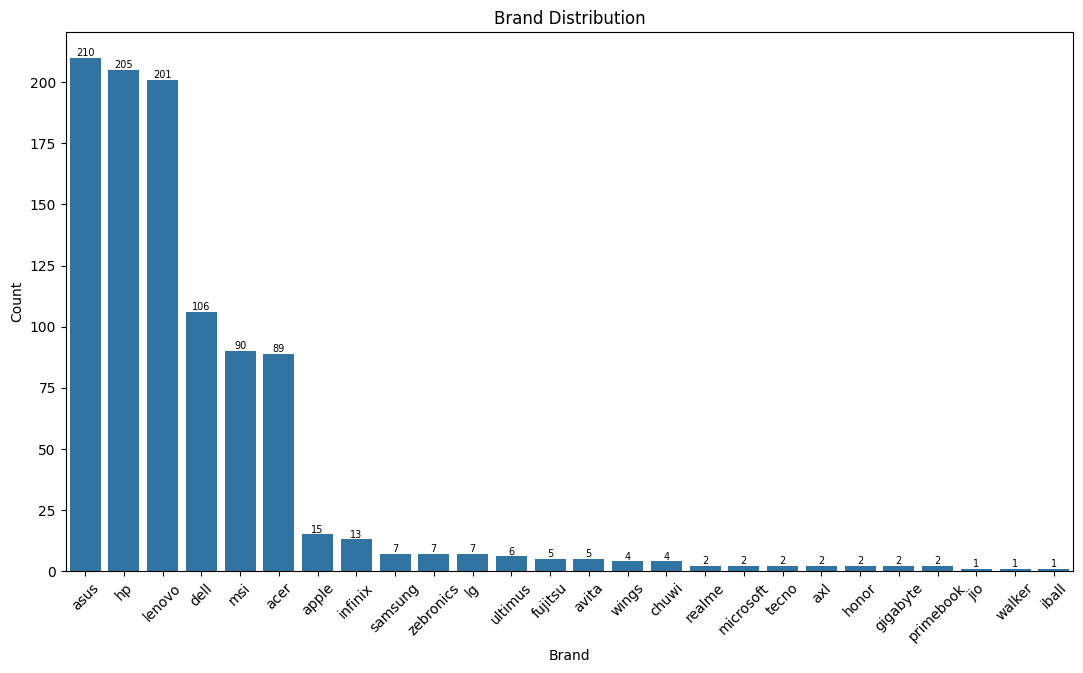

In [17]:
# Creating a bar plot for brand distribution
categorical = df.select_dtypes(include=['object'])
plt.figure(figsize=(13,7))
brand_counts = categorical['brand'].value_counts()
axis = sns.barplot(x=brand_counts.index, y=brand_counts.values)
axis.bar_label(axis.containers[0], fontsize=7)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')
plt.xticks(rotation=45)

# Save the plot
directory = os.getcwd()  # Using current working directory for saving
plt_obj = plt.gcf()
save_plot(plt_obj, 'test_plt.png', directory)


In [18]:
# Creating a histogram of laptop prices
df['Price'] = df['Price'].astype(int)
chart = alt.Chart(df).mark_bar(
    color='#7ca0ff',  # Bar color
    opacity=0.7       # Bar opacity
).encode(
    x=alt.X('Price:Q', bin=alt.Bin(maxbins=40), title='Price (USD)'),
    y=alt.Y('count()', title='Frequency'),
    tooltip=[alt.Tooltip('count()', title='Frequency'), alt.Tooltip('Price:Q', title='Price Range')]
).properties(
    title='Distribution of Laptop Prices',
    width=600,
    height=400
)

# Save the Altair plot
save_plot(chart, 'test_altair.png', directory)


## Model examples

 There are in 5 functions in the modeling part: preprocess_data,split_data,train_model,evaluate_model, and plot_metrics

In [19]:
# Load a dataset
df = pd.read_csv('DATA/laptops.csv')

# Specify the target variable
target_column = 'Price'  # Change 'Target' to the name of your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df, target_column)

# Train the logistic regression model
model = train_model(X_train, y_train)

# Evaluate the trained model
metrics = evaluate_model(model, X_test, y_test)

# Output the metrics to see the evaluation results
print("Model Evaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot and save the evaluation metrics
directory = 'output/'  # Ensure this directory exists or adjust to a valid path
filename = 'model_evaluation_metrics.png'
plot_metrics(metrics, filename, directory)
print(f"Plot saved to {os.path.join(directory, filename)}")

Model Evaluation Metrics:
accuracy: 0.0101
precision: 0.0021
recall: 0.0039
Plot saved to output/model_evaluation_metrics.png


/Users/lucas007/opt/anaconda3/envs/pylaptoppred/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucas007/opt/anaconda3/envs/pylaptoppred/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lucas007/opt/anaconda3/envs/pylaptoppred/lib/python3.11/site-packages/sklearn/metrics/_clas